In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os
import matplotlib.colors as mcolors

In [10]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'

lonlat_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
citylonlat = np.load(lonlat_path)

grid_path = f'{h08dir}/wsi/dat/cmy/world_citygrid.npy'
citygrid = np.load(grid_path)
citygrid_masked = np.ma.masked_where(citygrid==0, citygrid)

wup_list_path = 

In [11]:
def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

51.0 21.0


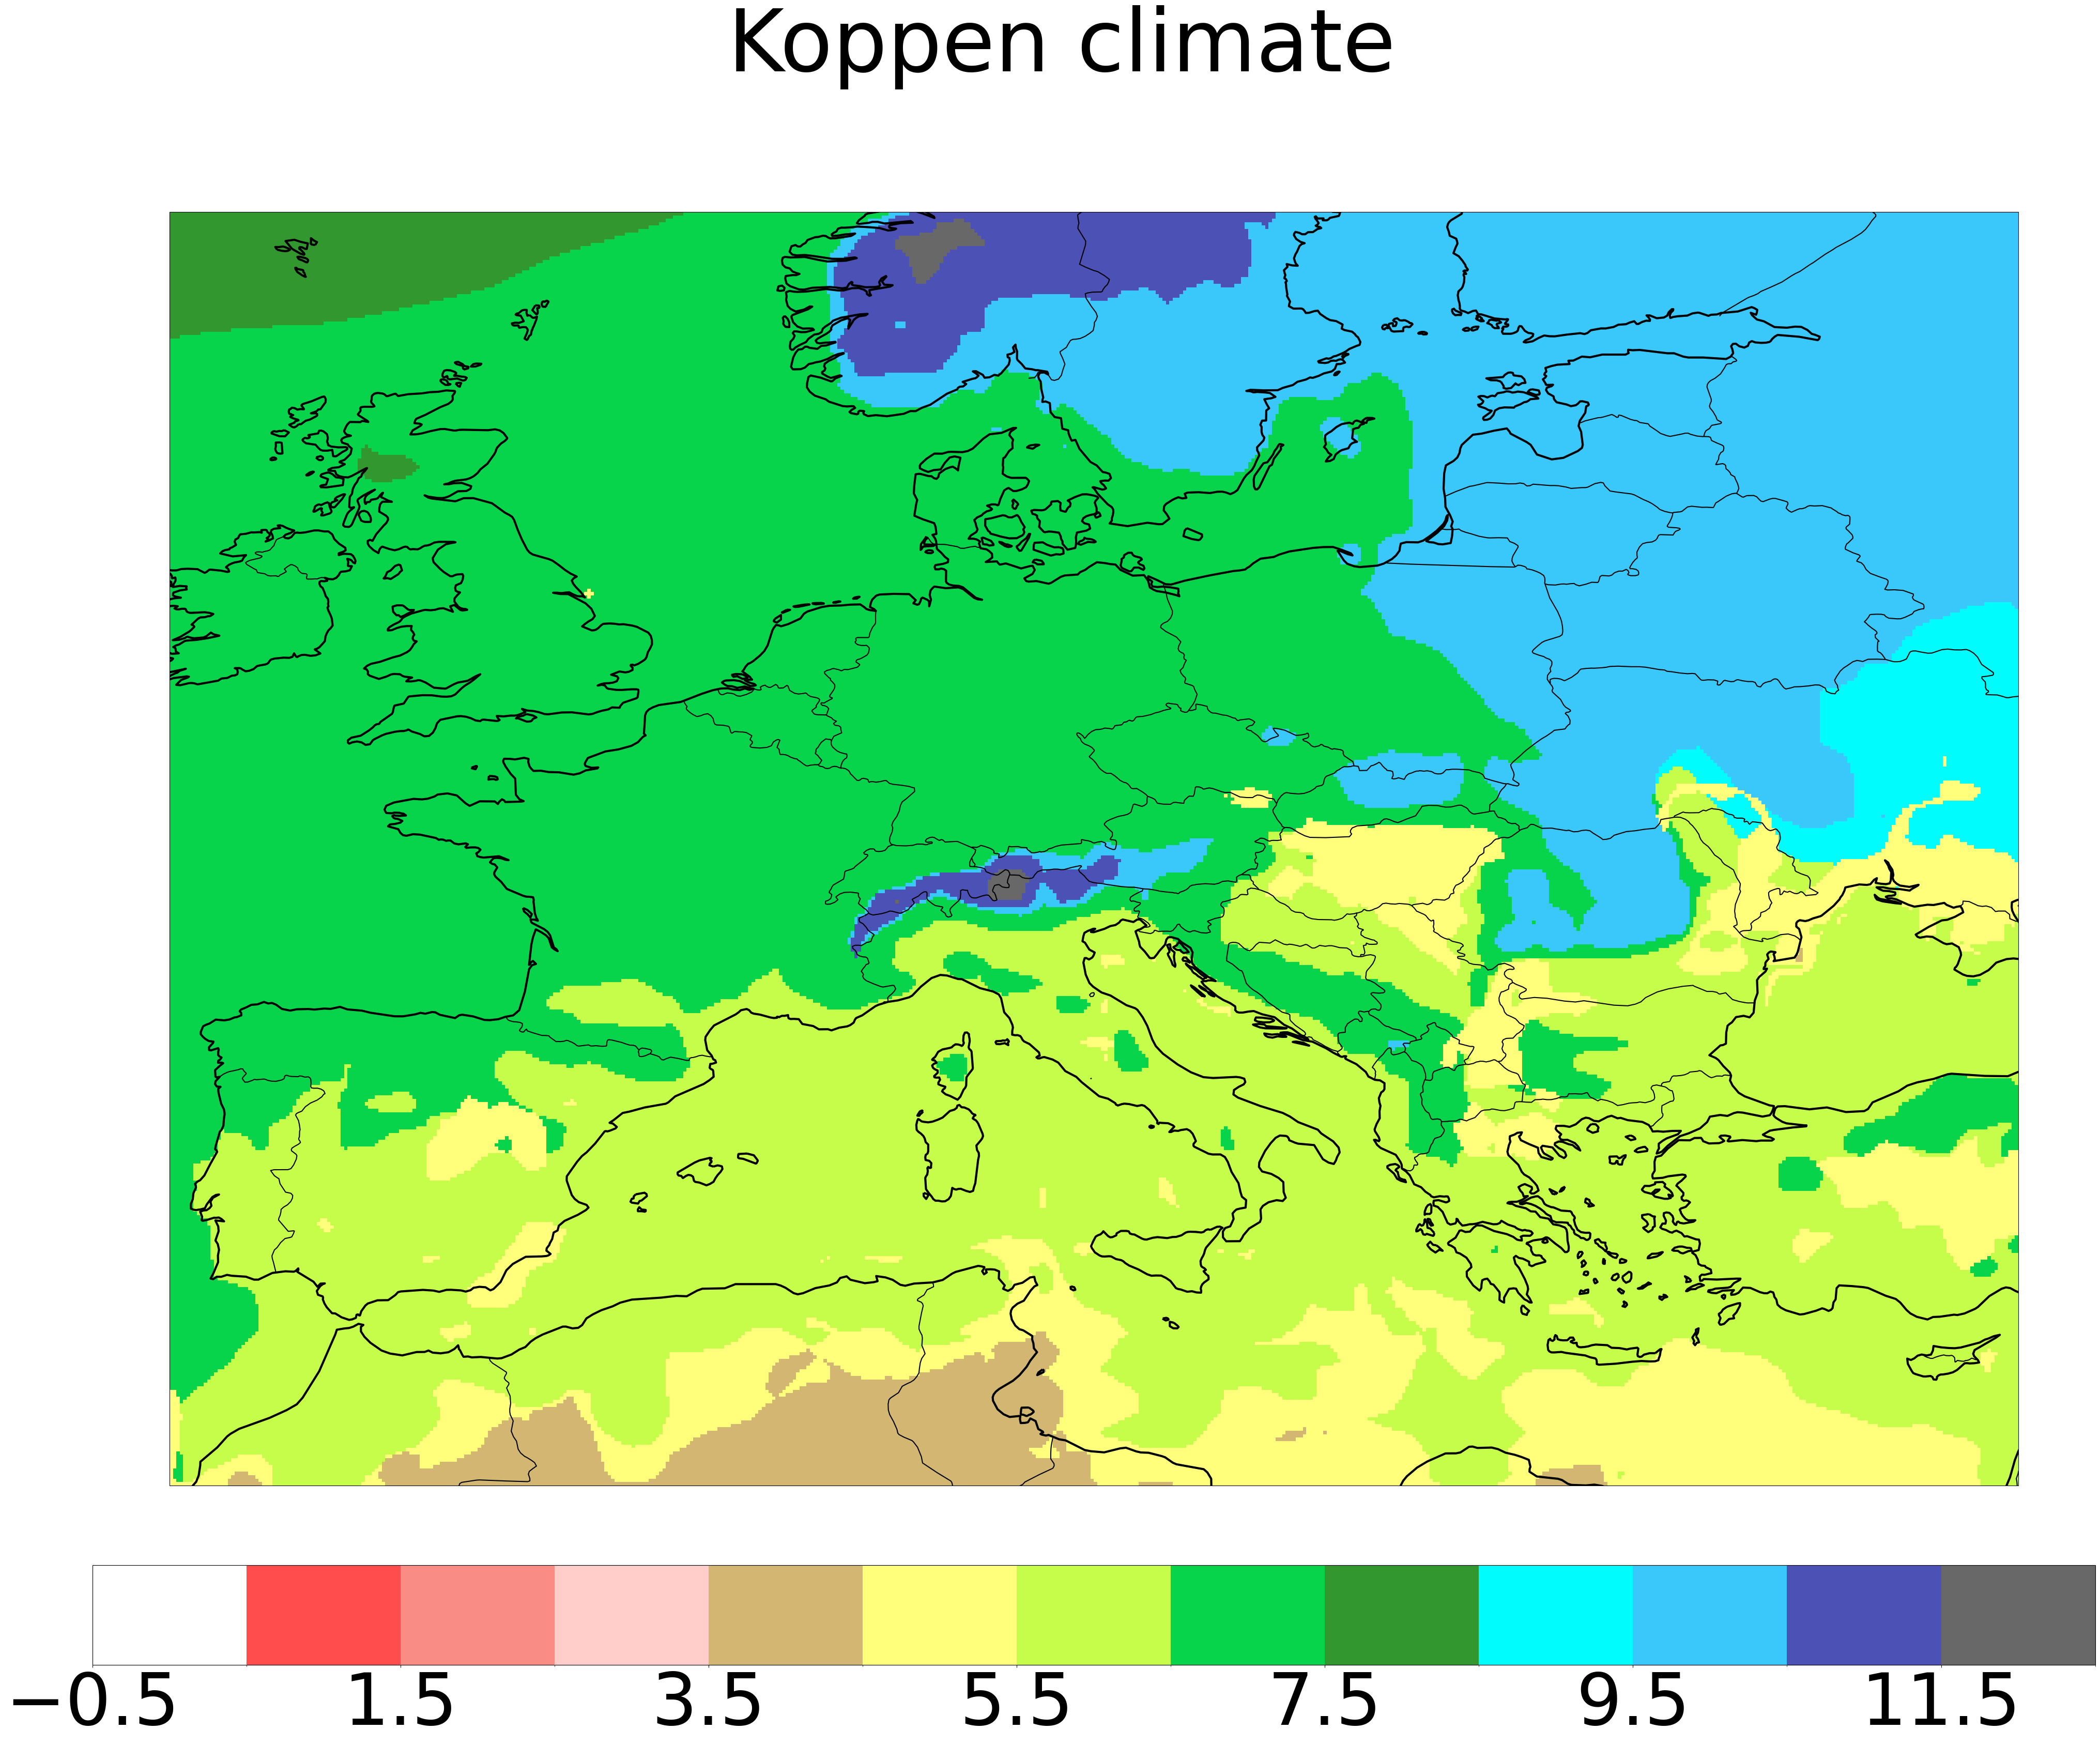

In [47]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-10, 35, 32, 63)
koppen_cropped = koppen[upperindex:lowerindex, leftindex:rightindex]
koppen_masked= np.ma.masked_where(koppen_cropped==0, koppen_cropped)

name_list = ['None', 'Af', 'Am', 'Aw', 'BW', 'BS', 'Ca', 'Cb', 'Cc', 'Da', 'Db', 'Dc', 'ET', 'EF']
color_list = [0, 11, 12, 13, 21, 22, 31, 32, 33, 41, 42, 43, 51, 52]
custom_colors = ['#FFFFFF',
                 '#ff4d4d', '#fa8c86', '#ffcecb', 
                 '#d4b673', '#ffff7c',
                 '#c5fd4a', '#08d44b', '#339730',
                 '#00fcfd', '#3ac7fa', '#4c51b5',
                 '#b2b2b2', '#686868',
                ]
cmap = mcolors.ListedColormap(custom_colors)
color_to_index = {value: idx for idx, value in enumerate(color_list)}
index_data = np.zeros(koppen_cropped.shape)
print(np.max(koppen_cropped), np.min(koppen_cropped))
for i in range(koppen_cropped.shape[0]):
    for j in range(koppen_cropped.shape[1]):
        index_data[i, j] = color_to_index[koppen_cropped[i,j]]
norm = mcolors.BoundaryNorm(np.arange(-0.5, len(color_list)-0.5, 1), cmap.N)

plt.rcParams["font.size"] = 100
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(index_data, 
              cmap= cmap,
              norm=norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
#ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=3, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='black')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Koppen climate')
plt.show()

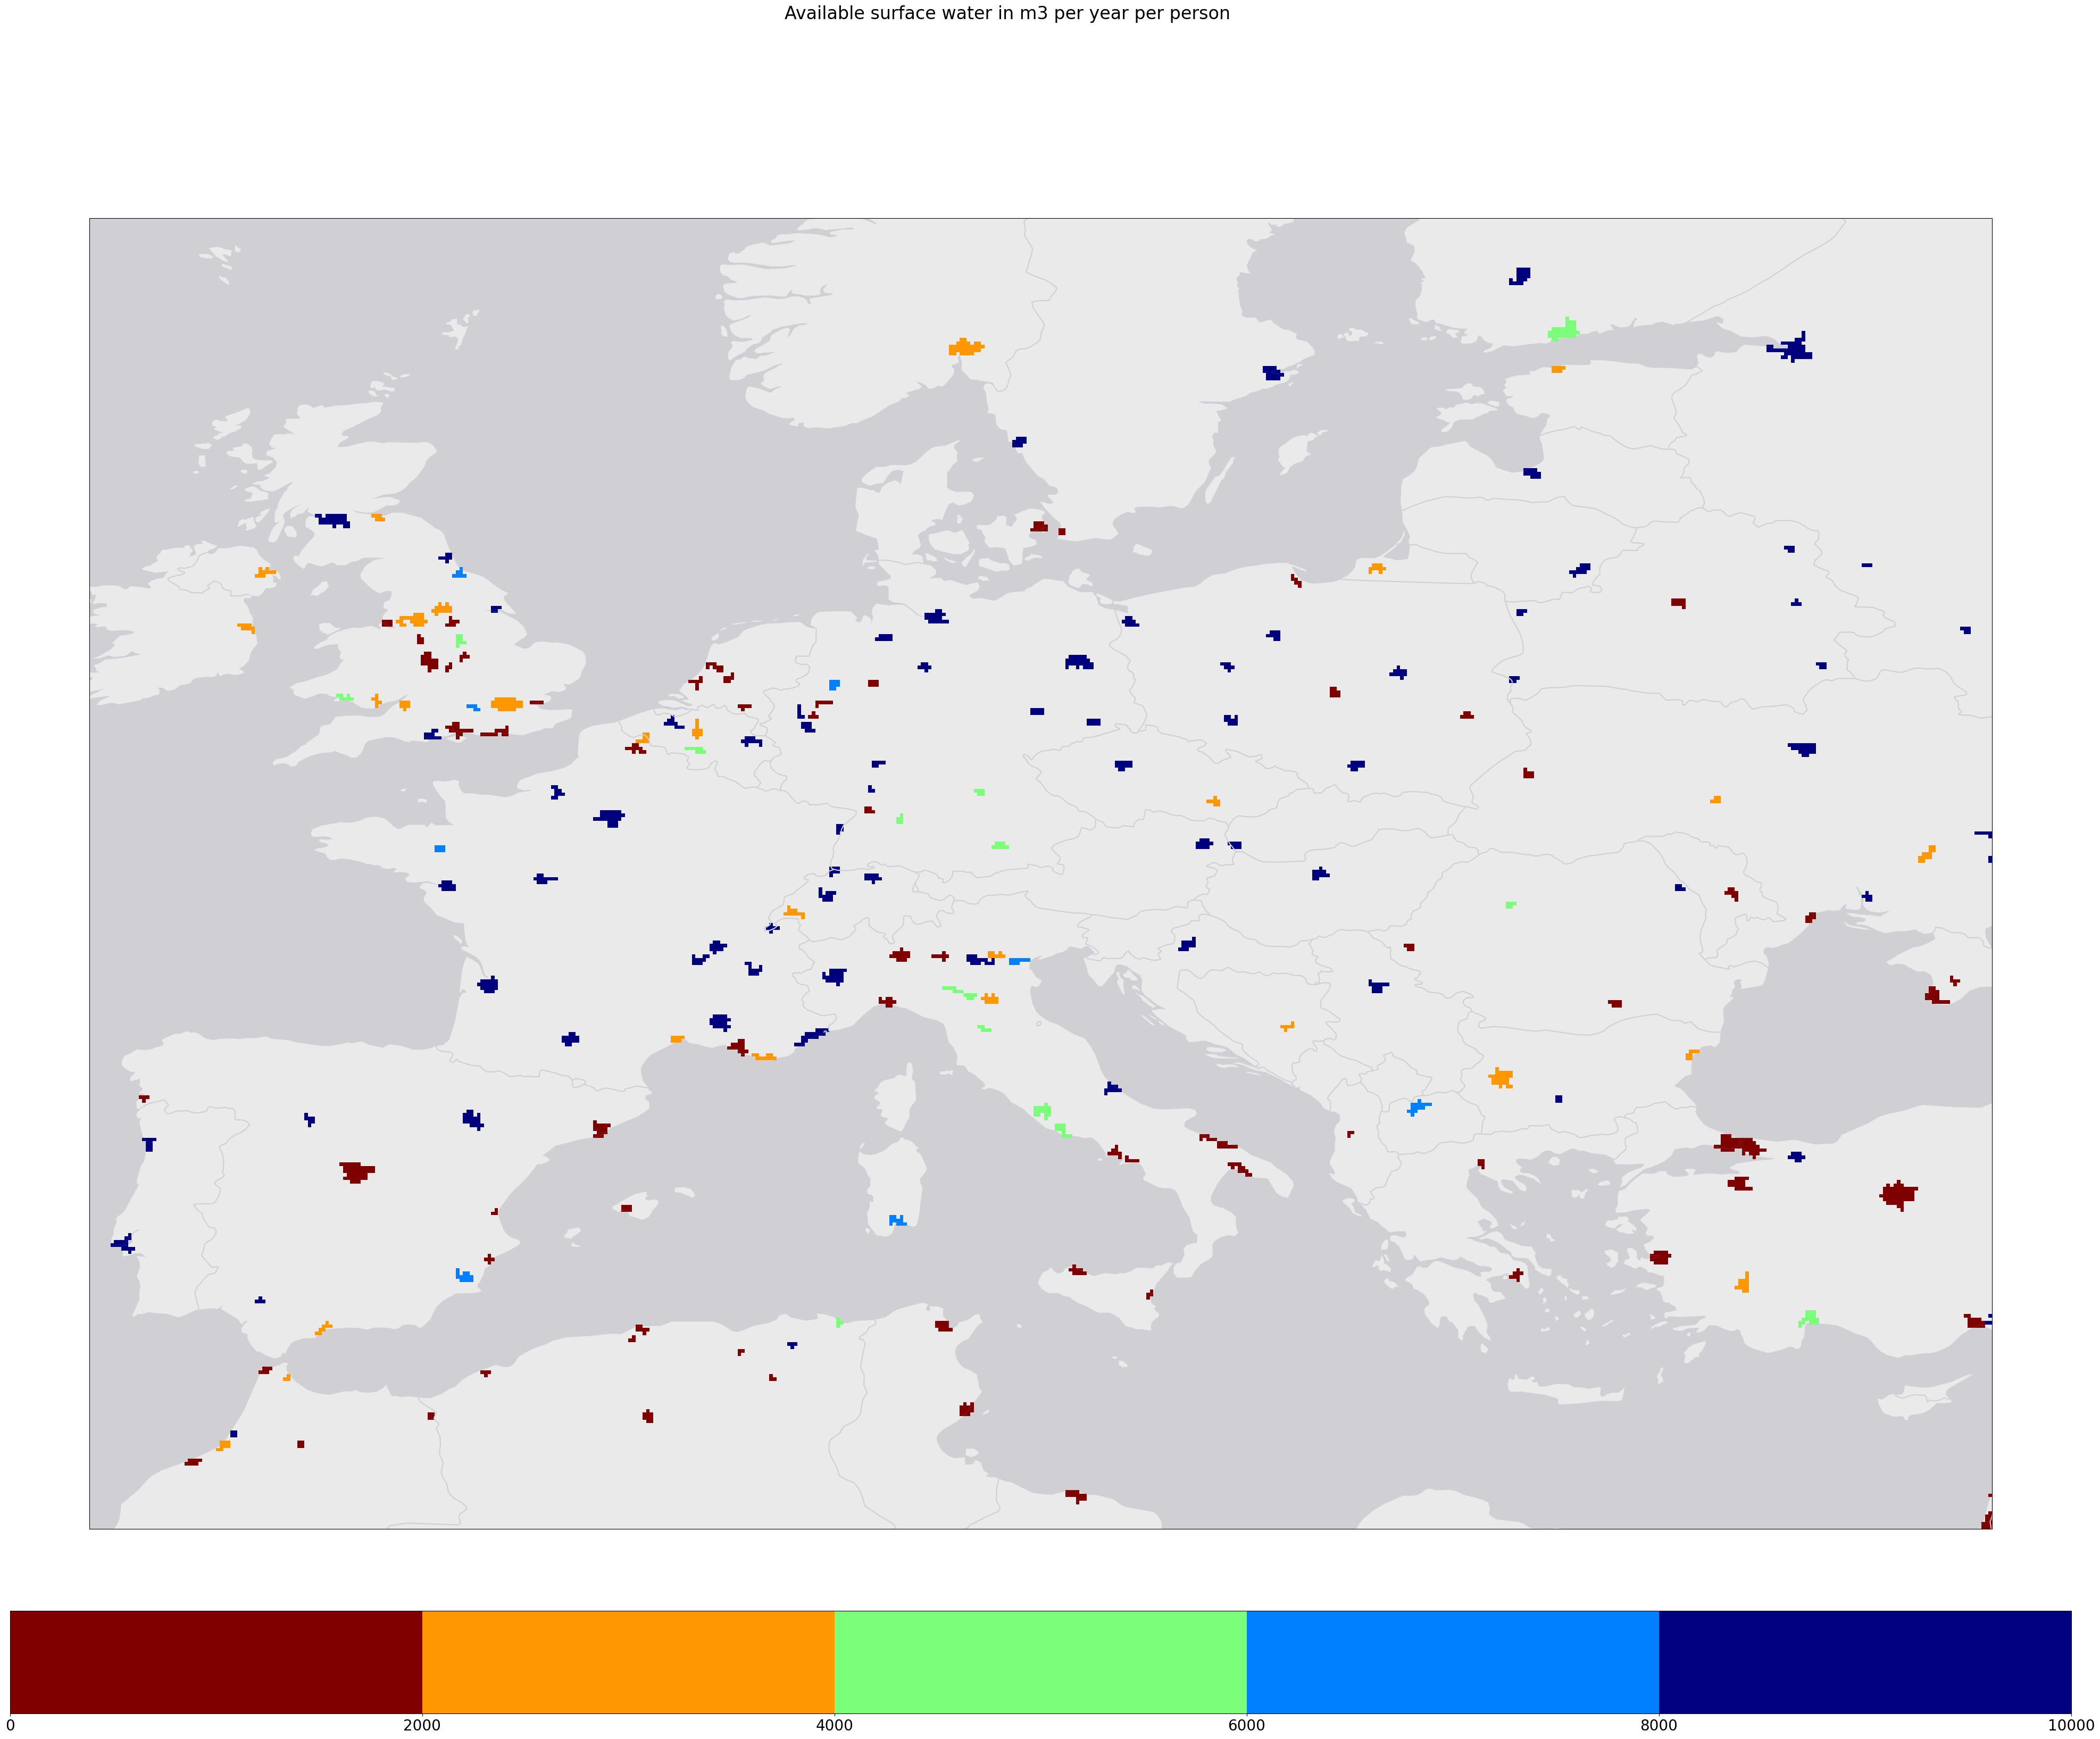

In [12]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-10, 35, 32, 63)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)

color_num = 5
bnd_max = 1e4
cmap = plt.get_cmap('jet_r', color_num)  # 10個の離散値
bounds = np.linspace(0, bnd_max, color_num+1)  # 範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

43.0 11.0


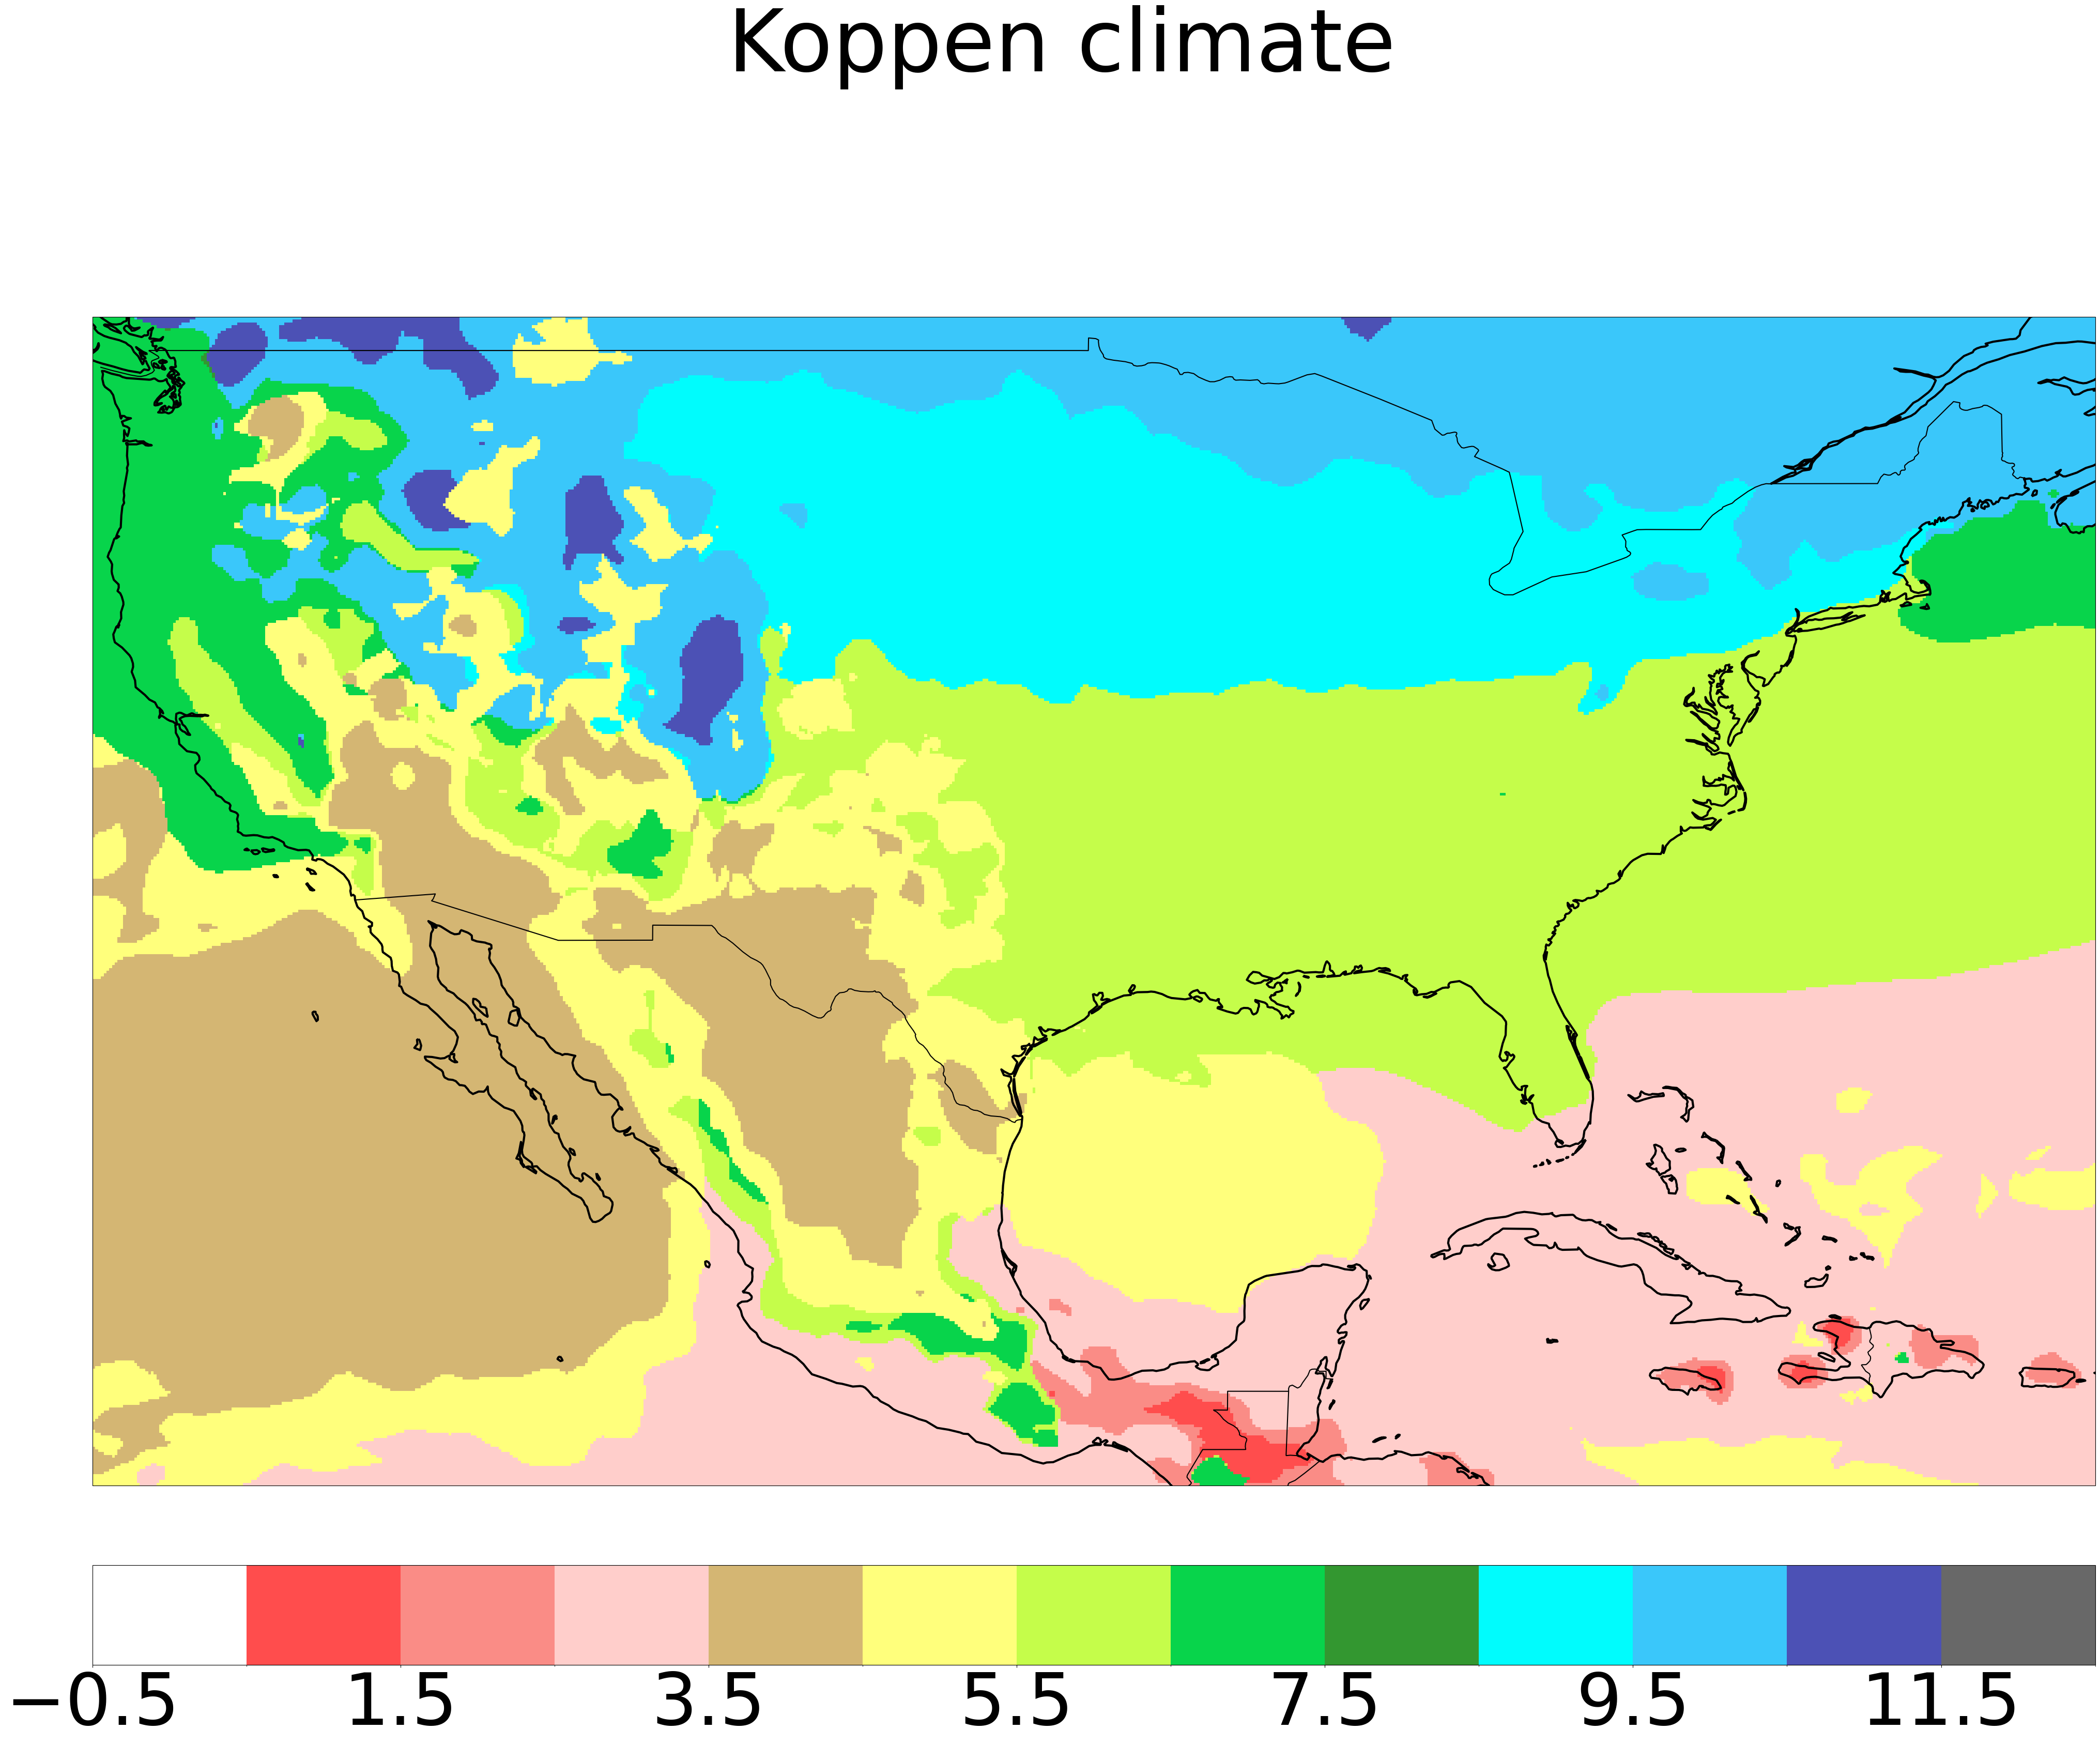

In [46]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-125, -65, 15, 50)
koppen_cropped = koppen[upperindex:lowerindex, leftindex:rightindex]
koppen_masked= np.ma.masked_where(koppen_cropped==0, koppen_cropped)

name_list = ['None', 'Af', 'Am', 'Aw', 'BW', 'BS', 'Ca', 'Cb', 'Cc', 'Da', 'Db', 'Dc', 'ET', 'EF']
color_list = [0, 11, 12, 13, 21, 22, 31, 32, 33, 41, 42, 43, 51, 52]
custom_colors = ['#FFFFFF',
                 '#ff4d4d', '#fa8c86', '#ffcecb', 
                 '#d4b673', '#ffff7c',
                 '#c5fd4a', '#08d44b', '#339730',
                 '#00fcfd', '#3ac7fa', '#4c51b5',
                 '#b2b2b2', '#686868',
                ]
cmap = mcolors.ListedColormap(custom_colors)
color_to_index = {value: idx for idx, value in enumerate(color_list)}
index_data = np.zeros(koppen_cropped.shape)
print(np.max(koppen_cropped), np.min(koppen_cropped))
for i in range(koppen_cropped.shape[0]):
    for j in range(koppen_cropped.shape[1]):
        index_data[i, j] = color_to_index[koppen_cropped[i,j]]
norm = mcolors.BoundaryNorm(np.arange(-0.5, len(color_list)-0.5, 1), cmap.N)

plt.rcParams["font.size"] = 100
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(index_data, 
              cmap= cmap,
              norm=norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
#ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=3, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='black')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Koppen-Geiger climate classification')
plt.show()

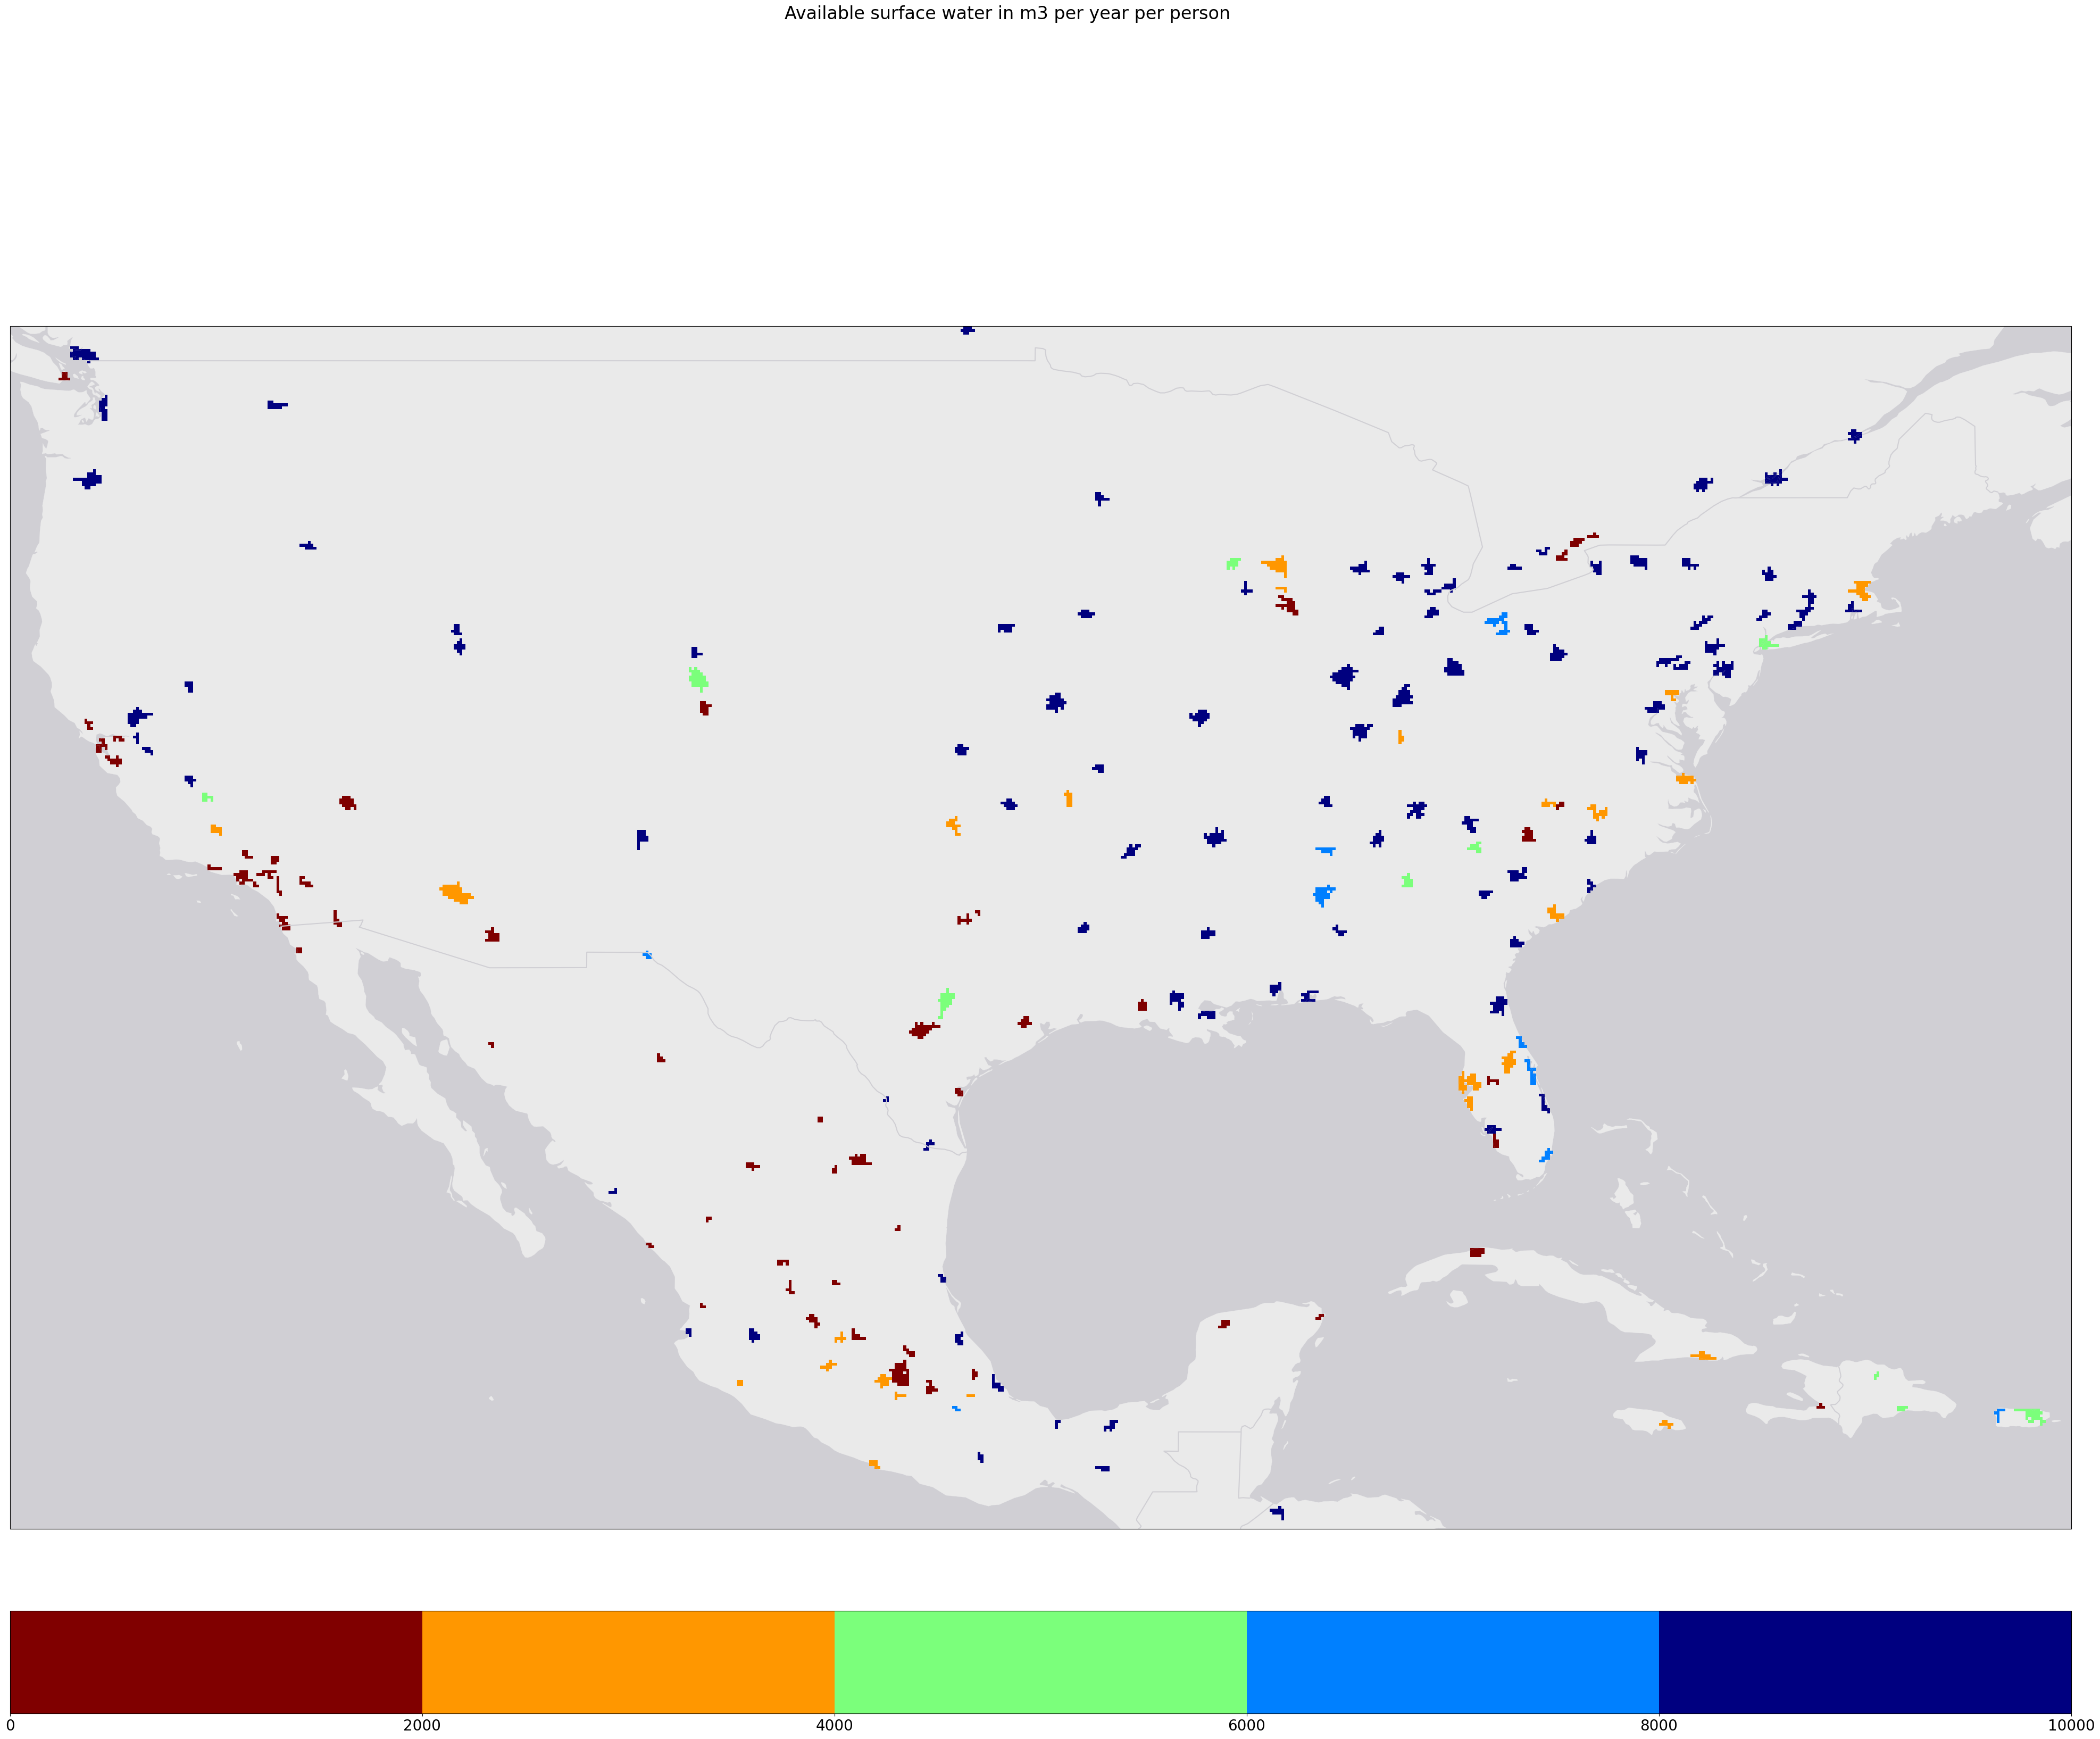

In [53]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-125, -65, 15, 50)
region = world_tmp[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)

color_num = 5
bnd_max = 1e4
cmap = plt.get_cmap('jet_r', color_num)  # 10個の離散値
bounds = np.linspace(0, bnd_max, color_num+1)  # 範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

51.0 11.0


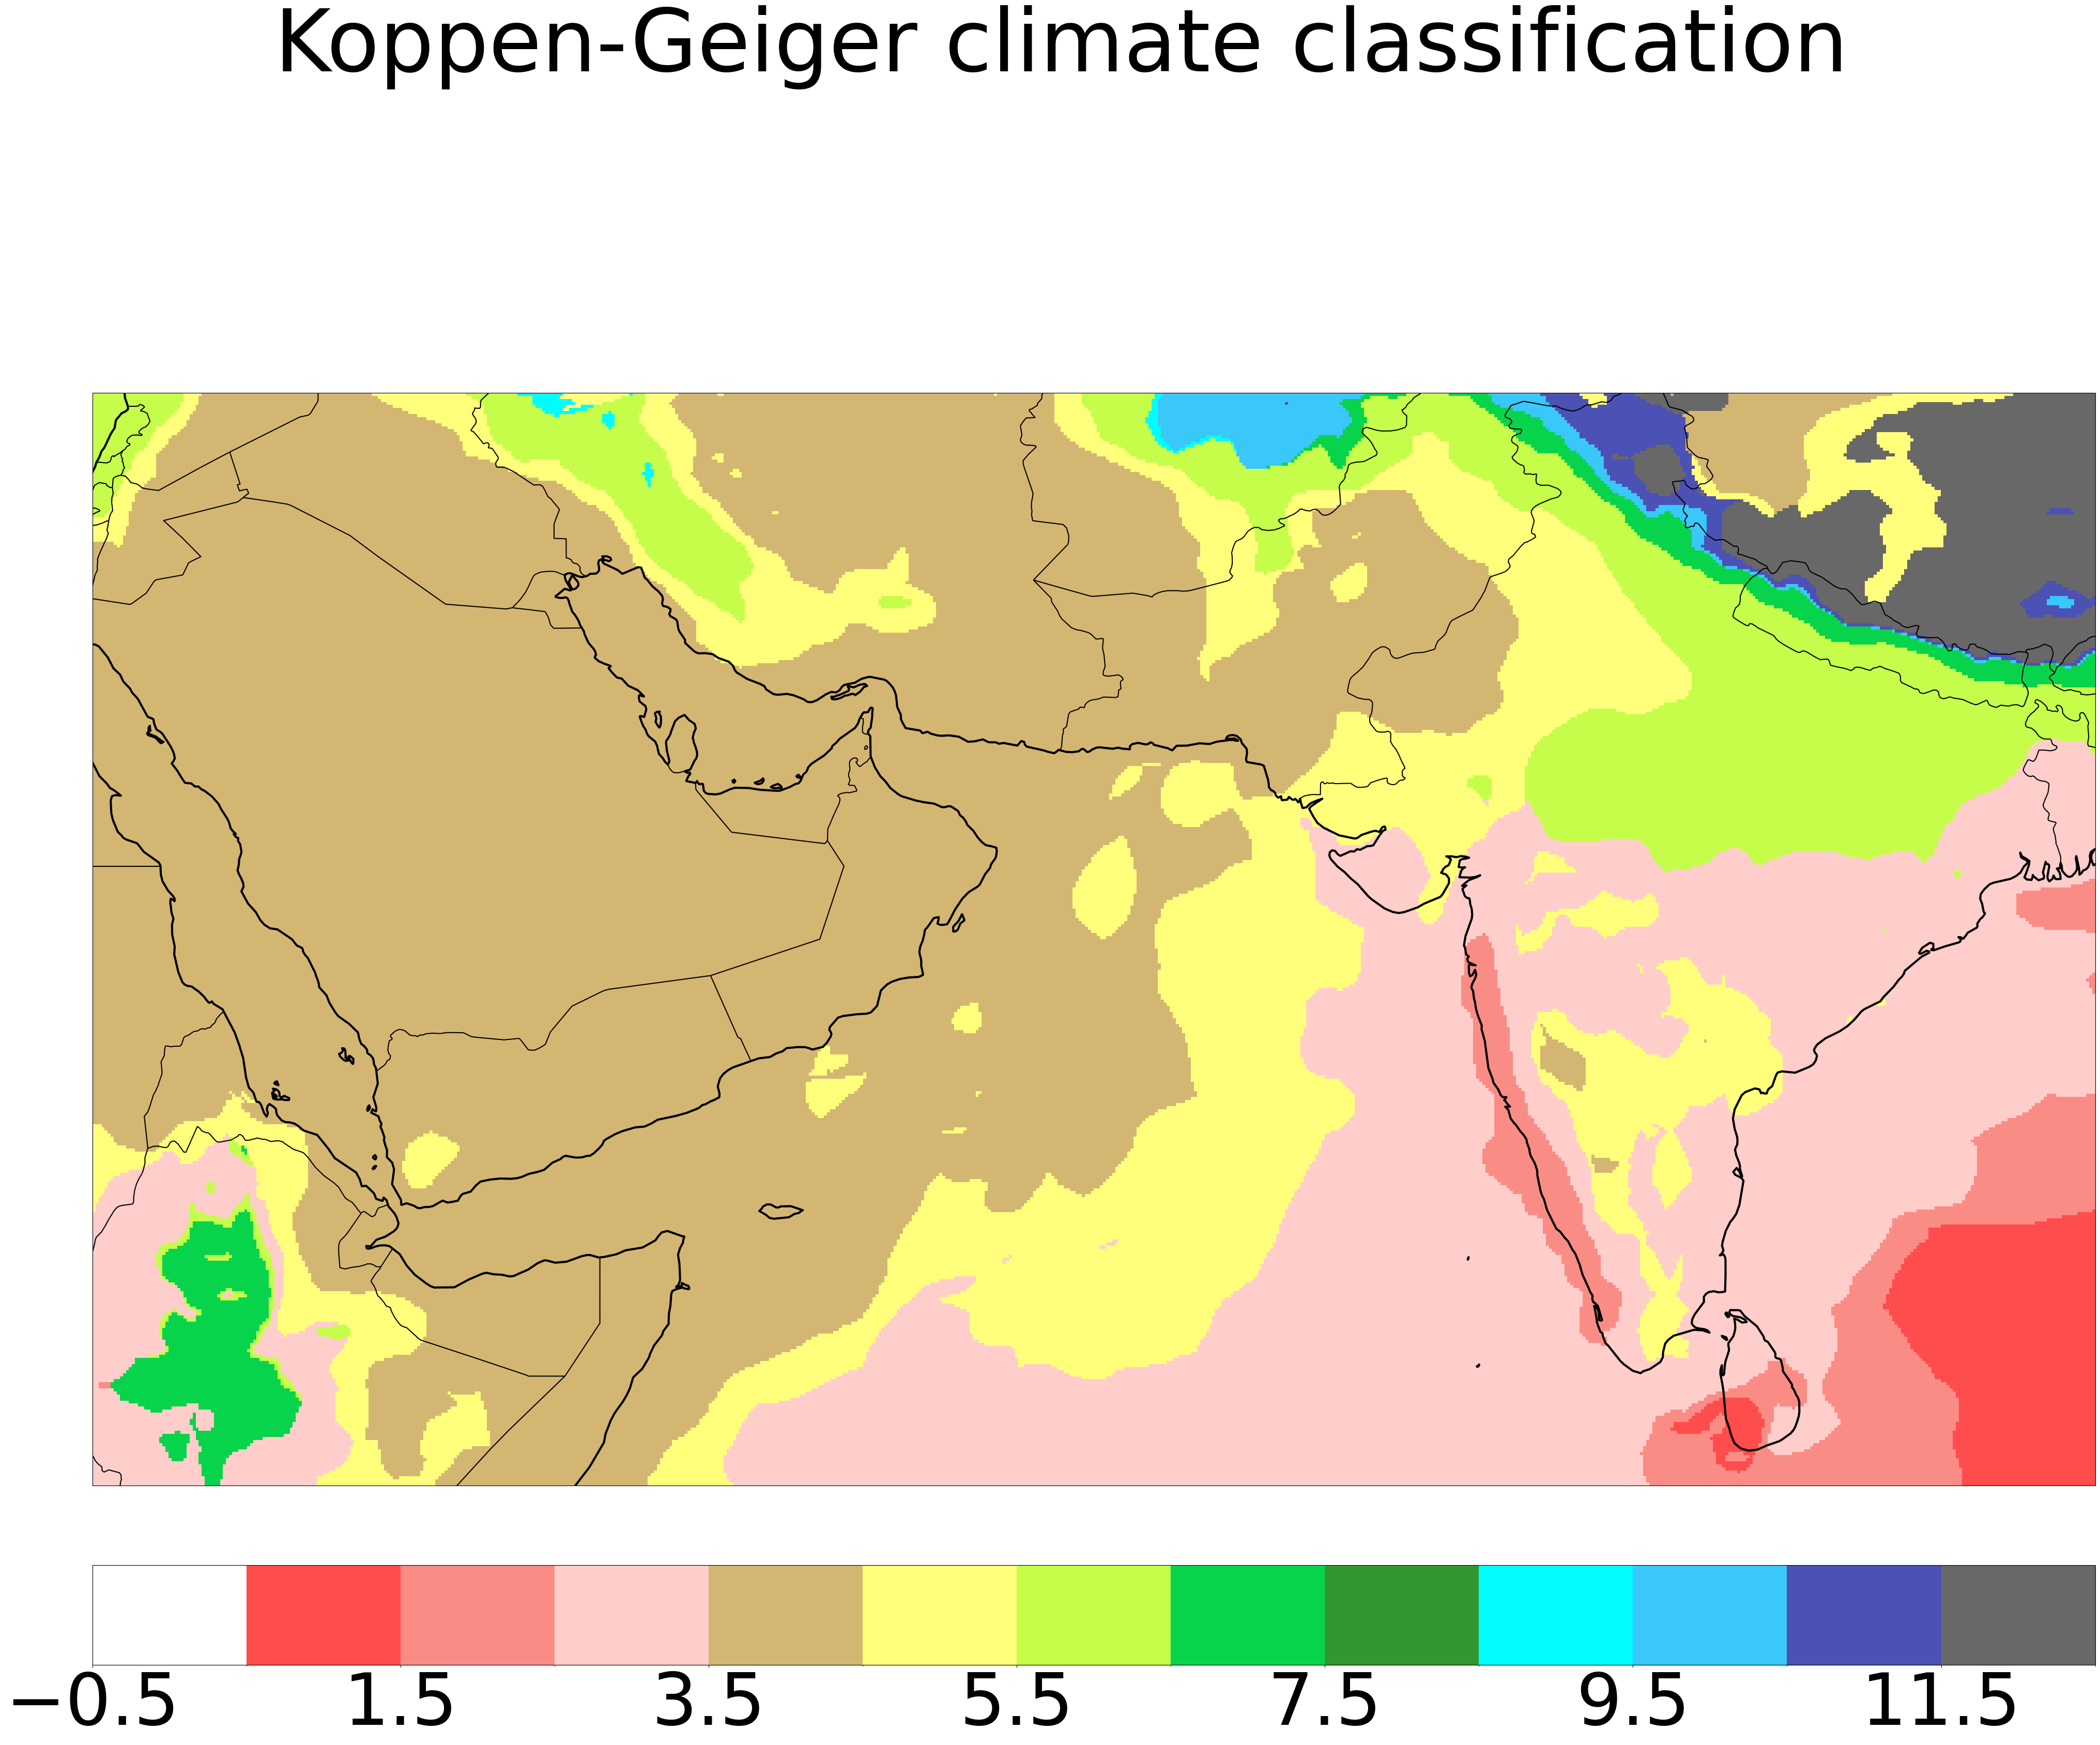

In [48]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(35, 90, 5, 35)
koppen_cropped = koppen[upperindex:lowerindex, leftindex:rightindex]
koppen_masked= np.ma.masked_where(koppen_cropped==0, koppen_cropped)

name_list = ['None', 'Af', 'Am', 'Aw', 'BW', 'BS', 'Ca', 'Cb', 'Cc', 'Da', 'Db', 'Dc', 'ET', 'EF']
color_list = [0, 11, 12, 13, 21, 22, 31, 32, 33, 41, 42, 43, 51, 52]
custom_colors = ['#FFFFFF',
                 '#ff4d4d', '#fa8c86', '#ffcecb', 
                 '#d4b673', '#ffff7c',
                 '#c5fd4a', '#08d44b', '#339730',
                 '#00fcfd', '#3ac7fa', '#4c51b5',
                 '#b2b2b2', '#686868',
                ]
cmap = mcolors.ListedColormap(custom_colors)
color_to_index = {value: idx for idx, value in enumerate(color_list)}
index_data = np.zeros(koppen_cropped.shape)
print(np.max(koppen_cropped), np.min(koppen_cropped))
for i in range(koppen_cropped.shape[0]):
    for j in range(koppen_cropped.shape[1]):
        index_data[i, j] = color_to_index[koppen_cropped[i,j]]
norm = mcolors.BoundaryNorm(np.arange(-0.5, len(color_list)-0.5, 1), cmap.N)

plt.rcParams["font.size"] = 100
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(index_data, 
              cmap= cmap,
              norm=norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
#ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=3, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='black')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Koppen-Geiger climate classification')
plt.show() 

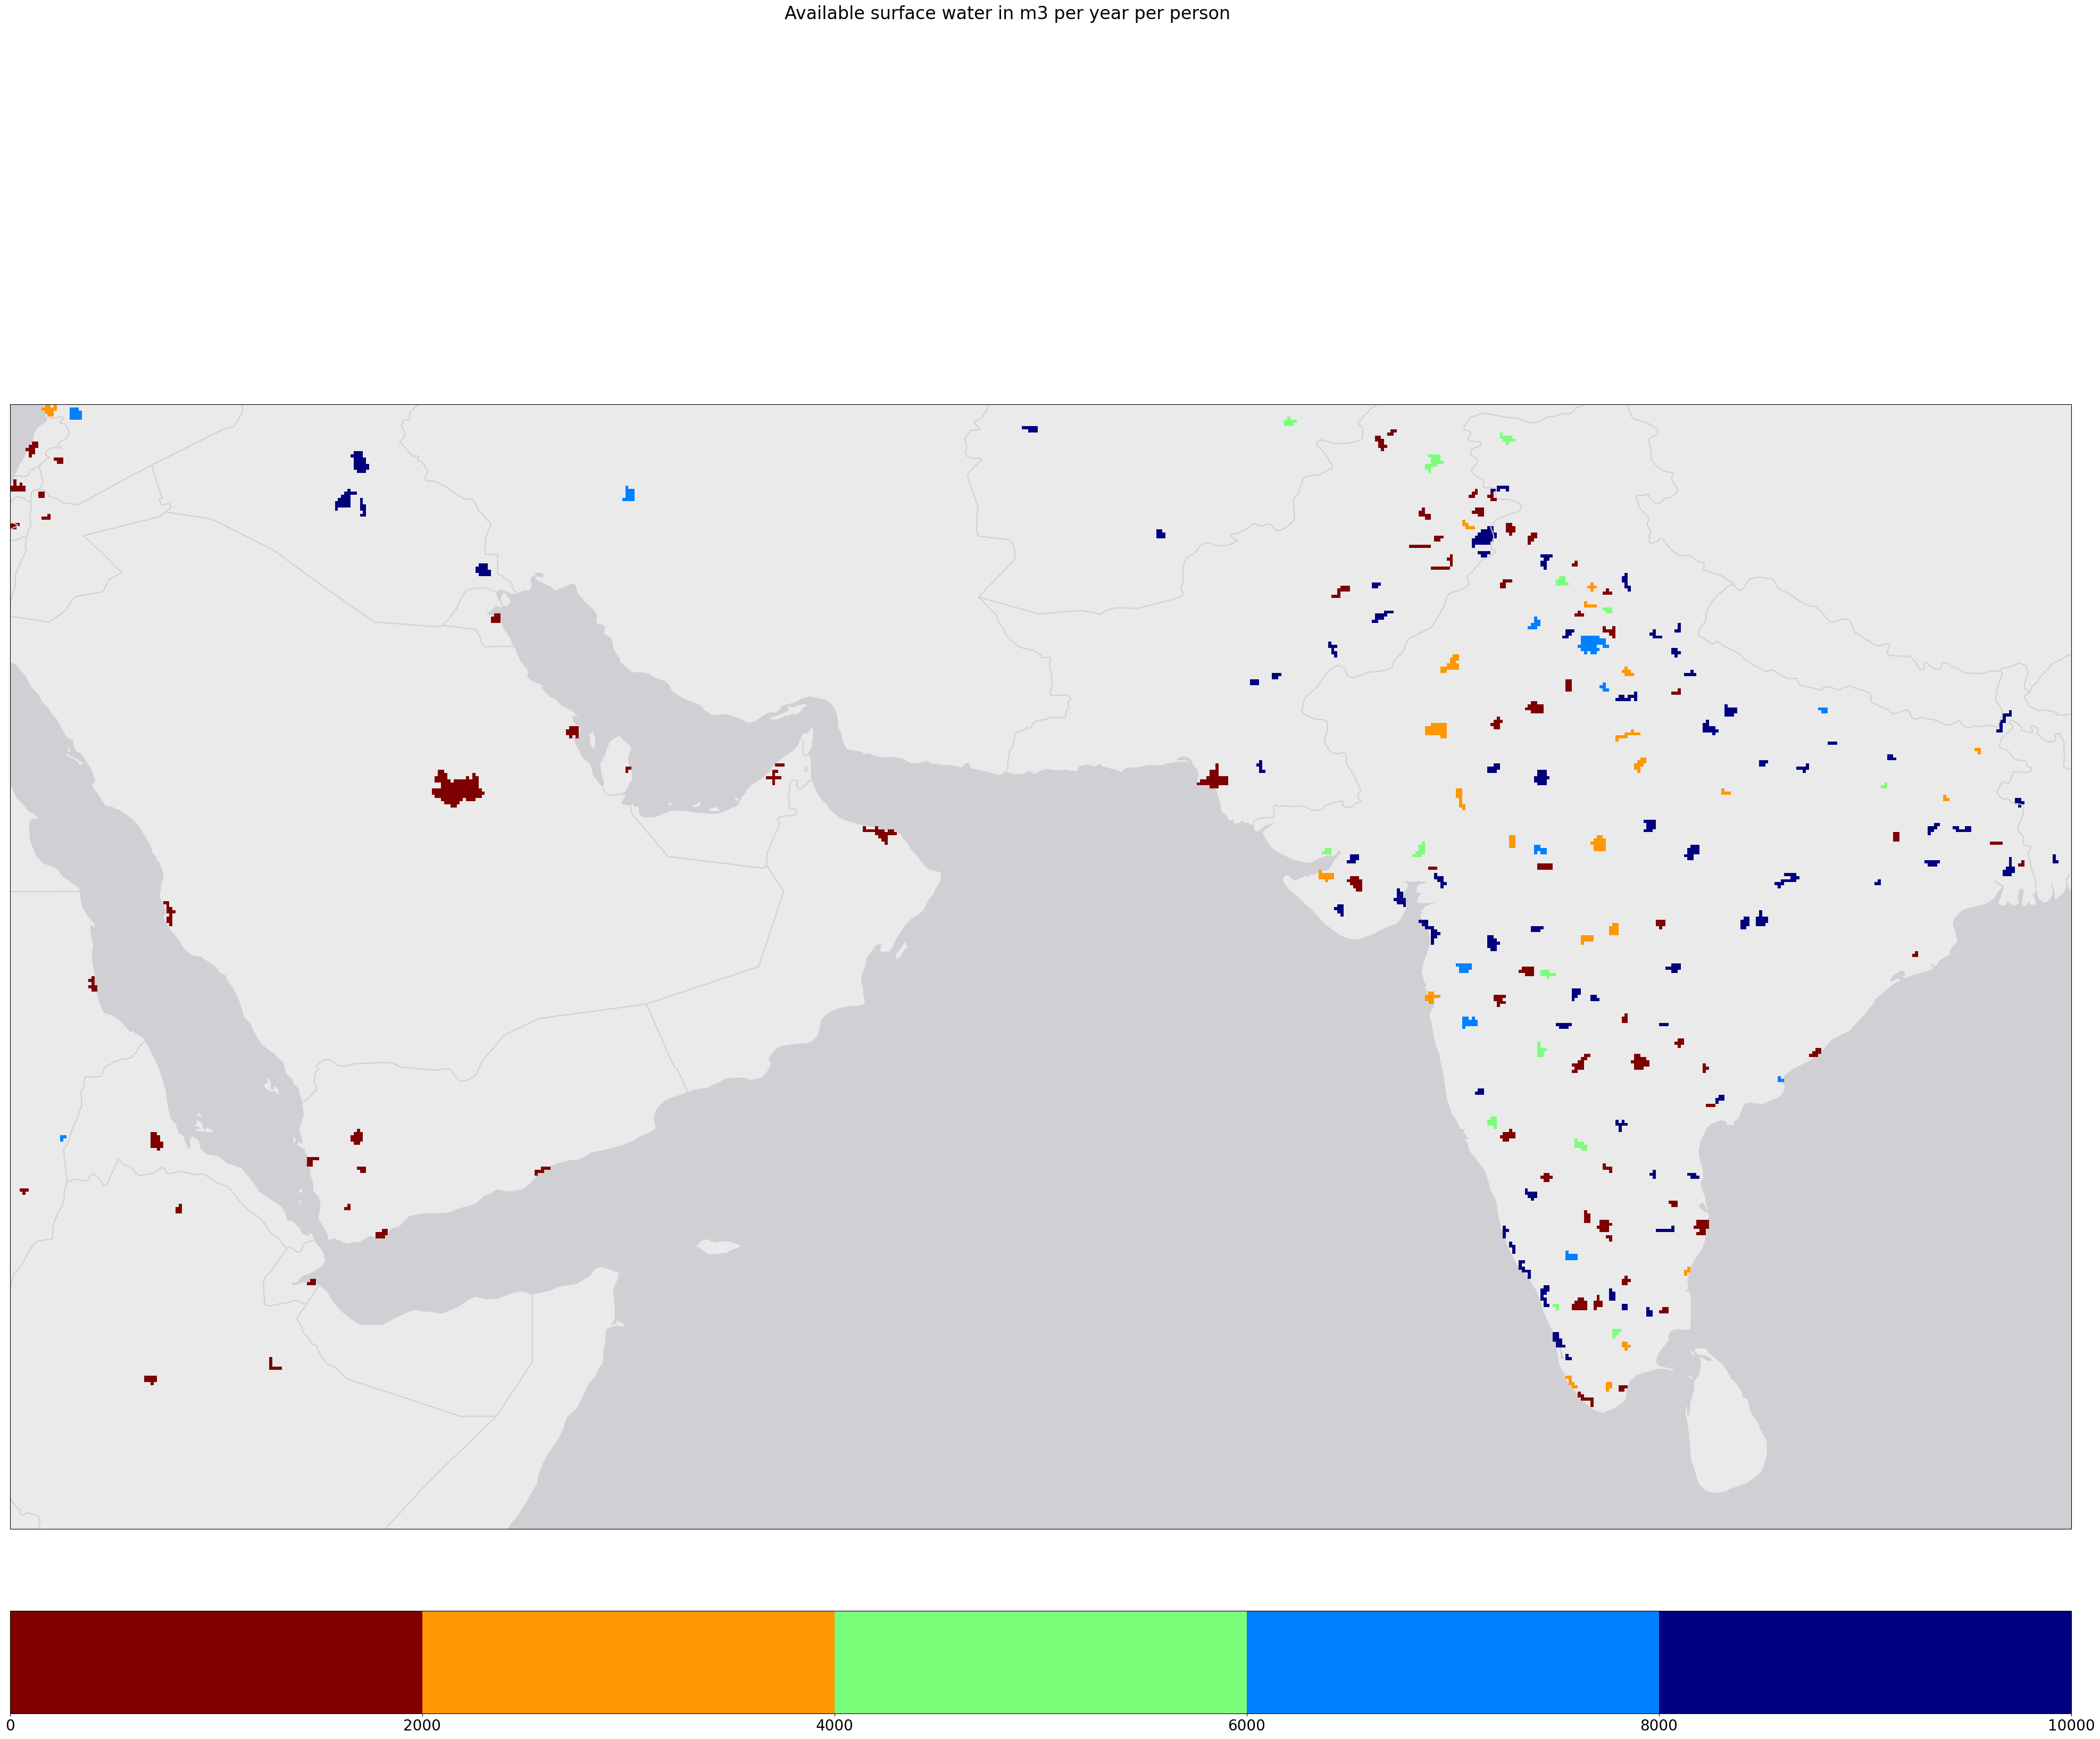

In [52]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(35, 90, 5, 35)
region = world_tmp[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)

color_num = 5
bnd_max = 1e4
cmap = plt.get_cmap('jet_r', color_num)  # 10個の離散値
bounds = np.linspace(0, bnd_max, color_num+1)  # 範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

51.0 11.0


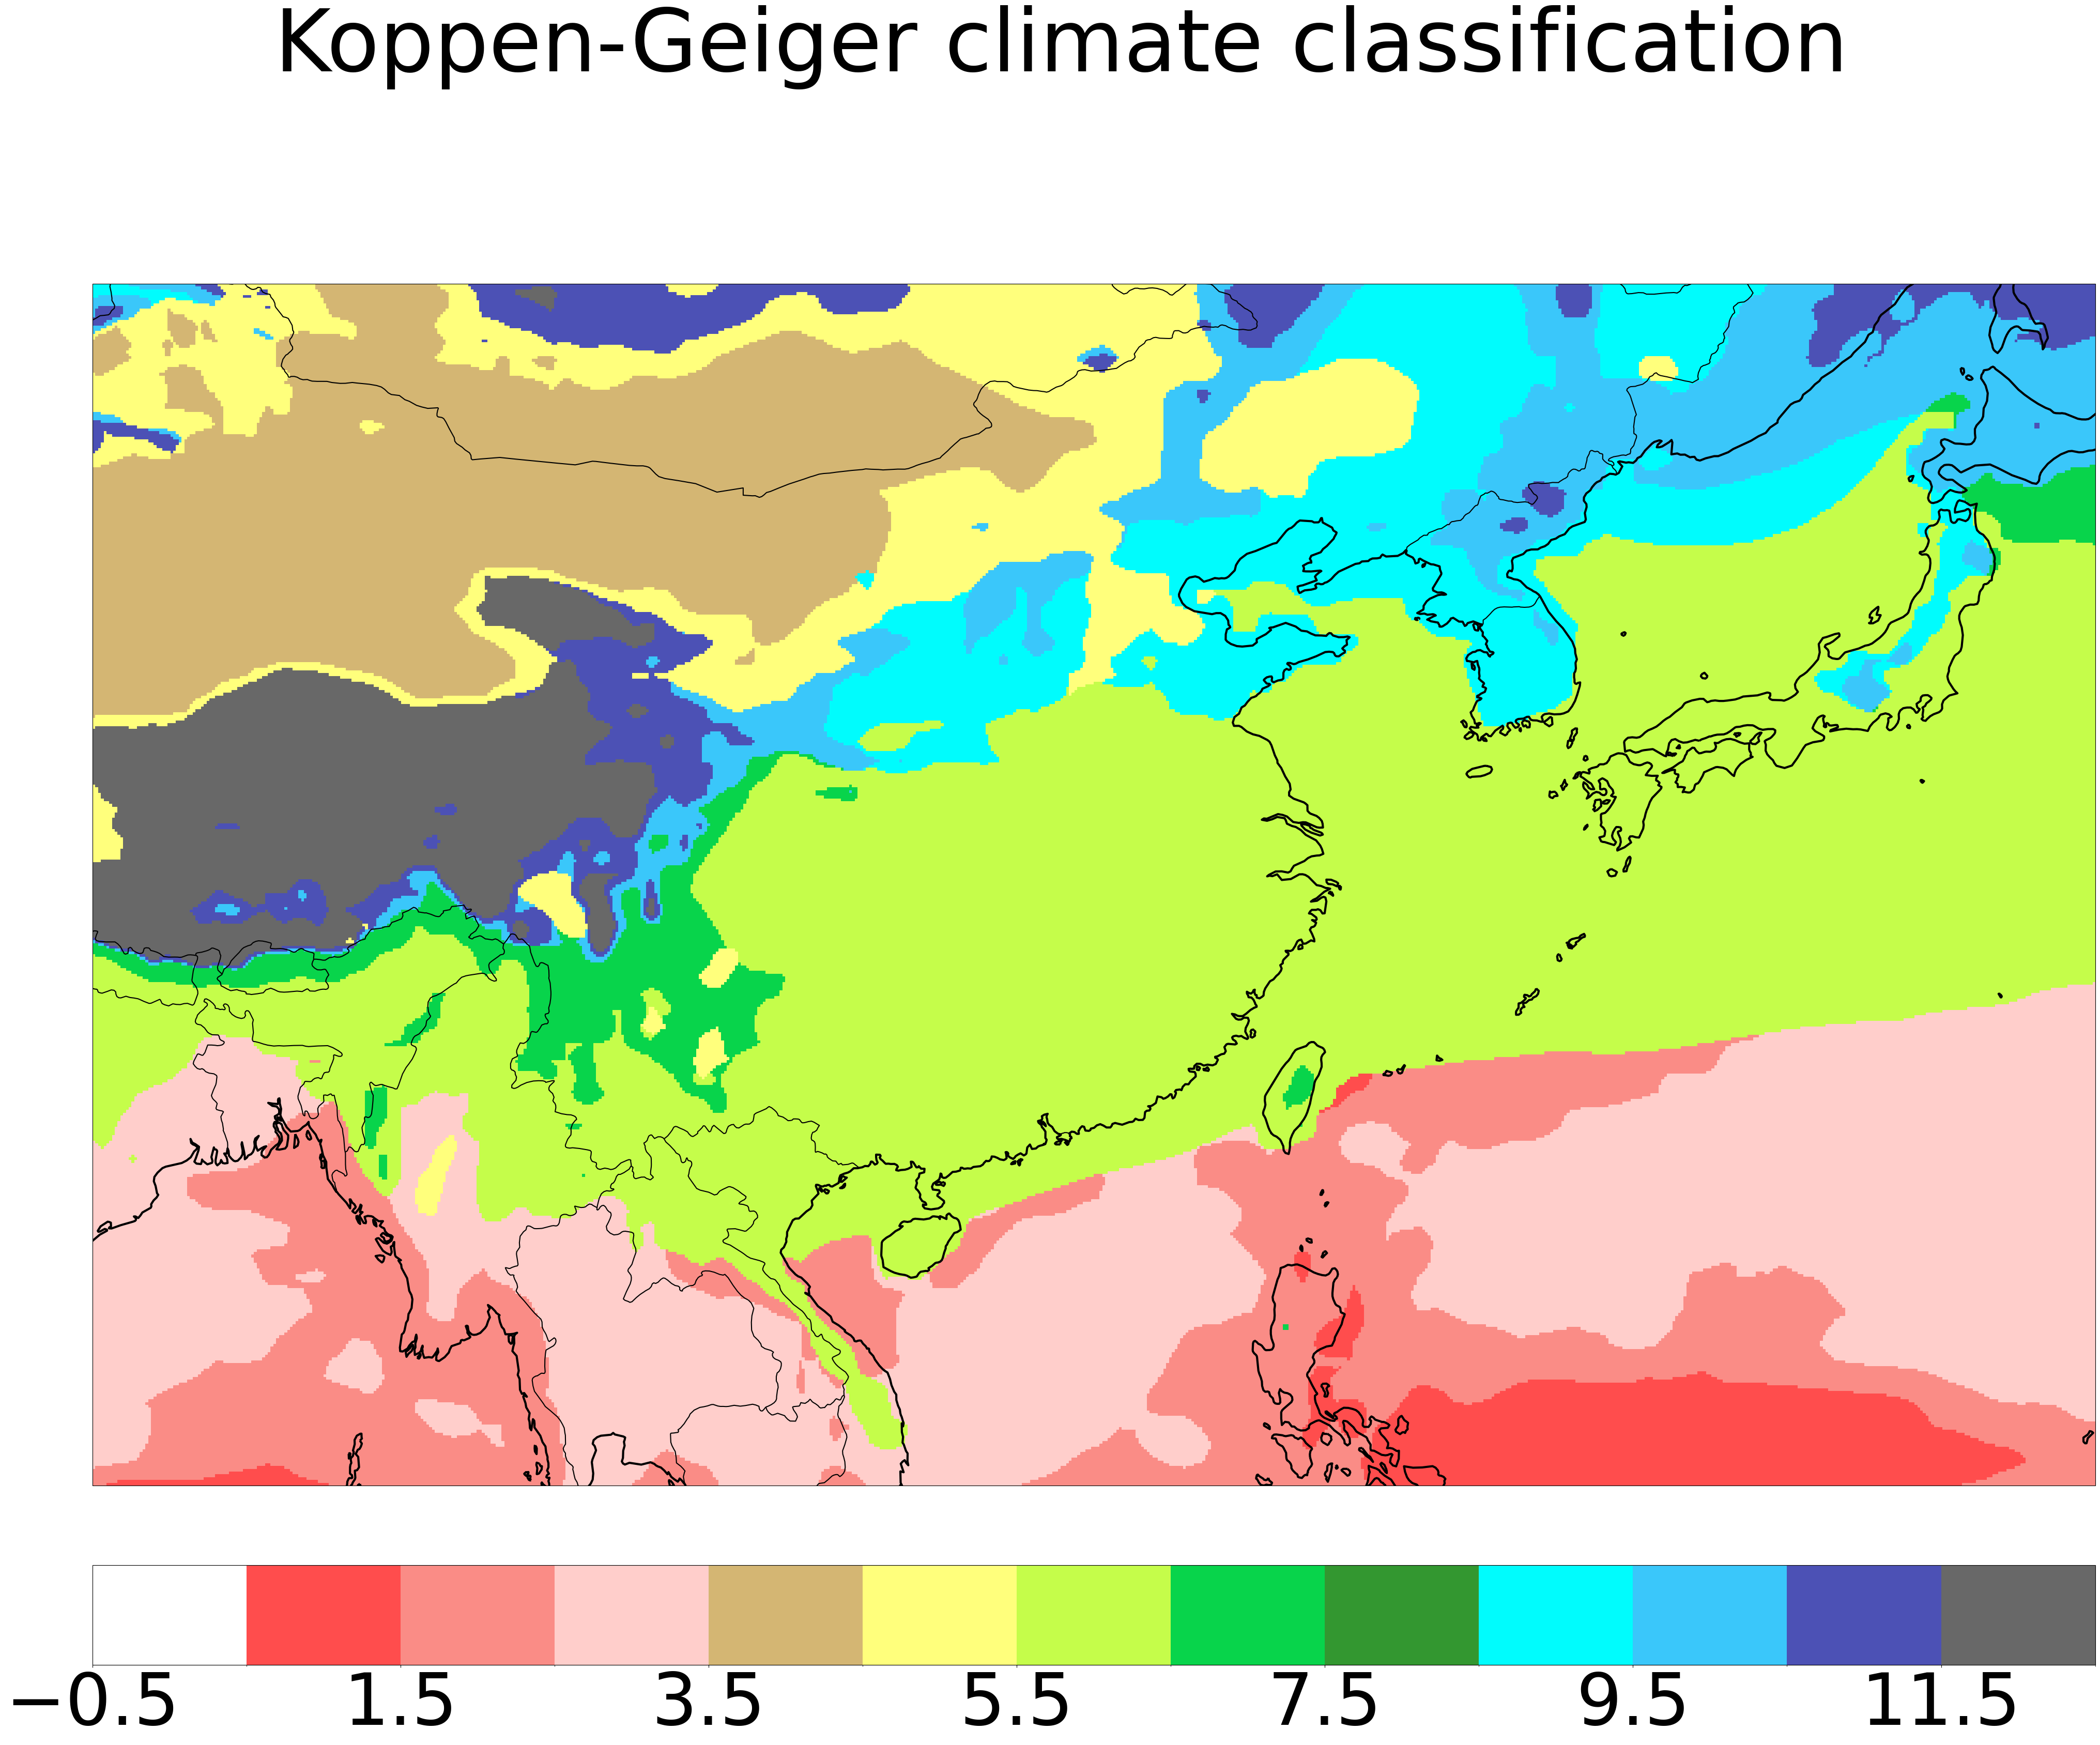

In [49]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(85, 145, 12, 48)
koppen_cropped = koppen[upperindex:lowerindex, leftindex:rightindex]
koppen_masked= np.ma.masked_where(koppen_cropped==0, koppen_cropped)

name_list = ['None', 'Af', 'Am', 'Aw', 'BW', 'BS', 'Ca', 'Cb', 'Cc', 'Da', 'Db', 'Dc', 'ET', 'EF']
color_list = [0, 11, 12, 13, 21, 22, 31, 32, 33, 41, 42, 43, 51, 52]
custom_colors = ['#FFFFFF',
                 '#ff4d4d', '#fa8c86', '#ffcecb', 
                 '#d4b673', '#ffff7c',
                 '#c5fd4a', '#08d44b', '#339730',
                 '#00fcfd', '#3ac7fa', '#4c51b5',
                 '#b2b2b2', '#686868',
                ]
cmap = mcolors.ListedColormap(custom_colors)
color_to_index = {value: idx for idx, value in enumerate(color_list)}
index_data = np.zeros(koppen_cropped.shape)
print(np.max(koppen_cropped), np.min(koppen_cropped))
for i in range(koppen_cropped.shape[0]):
    for j in range(koppen_cropped.shape[1]):
        index_data[i, j] = color_to_index[koppen_cropped[i,j]]
norm = mcolors.BoundaryNorm(np.arange(-0.5, len(color_list)-0.5, 1), cmap.N)

plt.rcParams["font.size"] = 100
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(index_data, 
              cmap= cmap,
              norm=norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
#ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=3, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='black')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Koppen-Geiger climate classification')
plt.show()

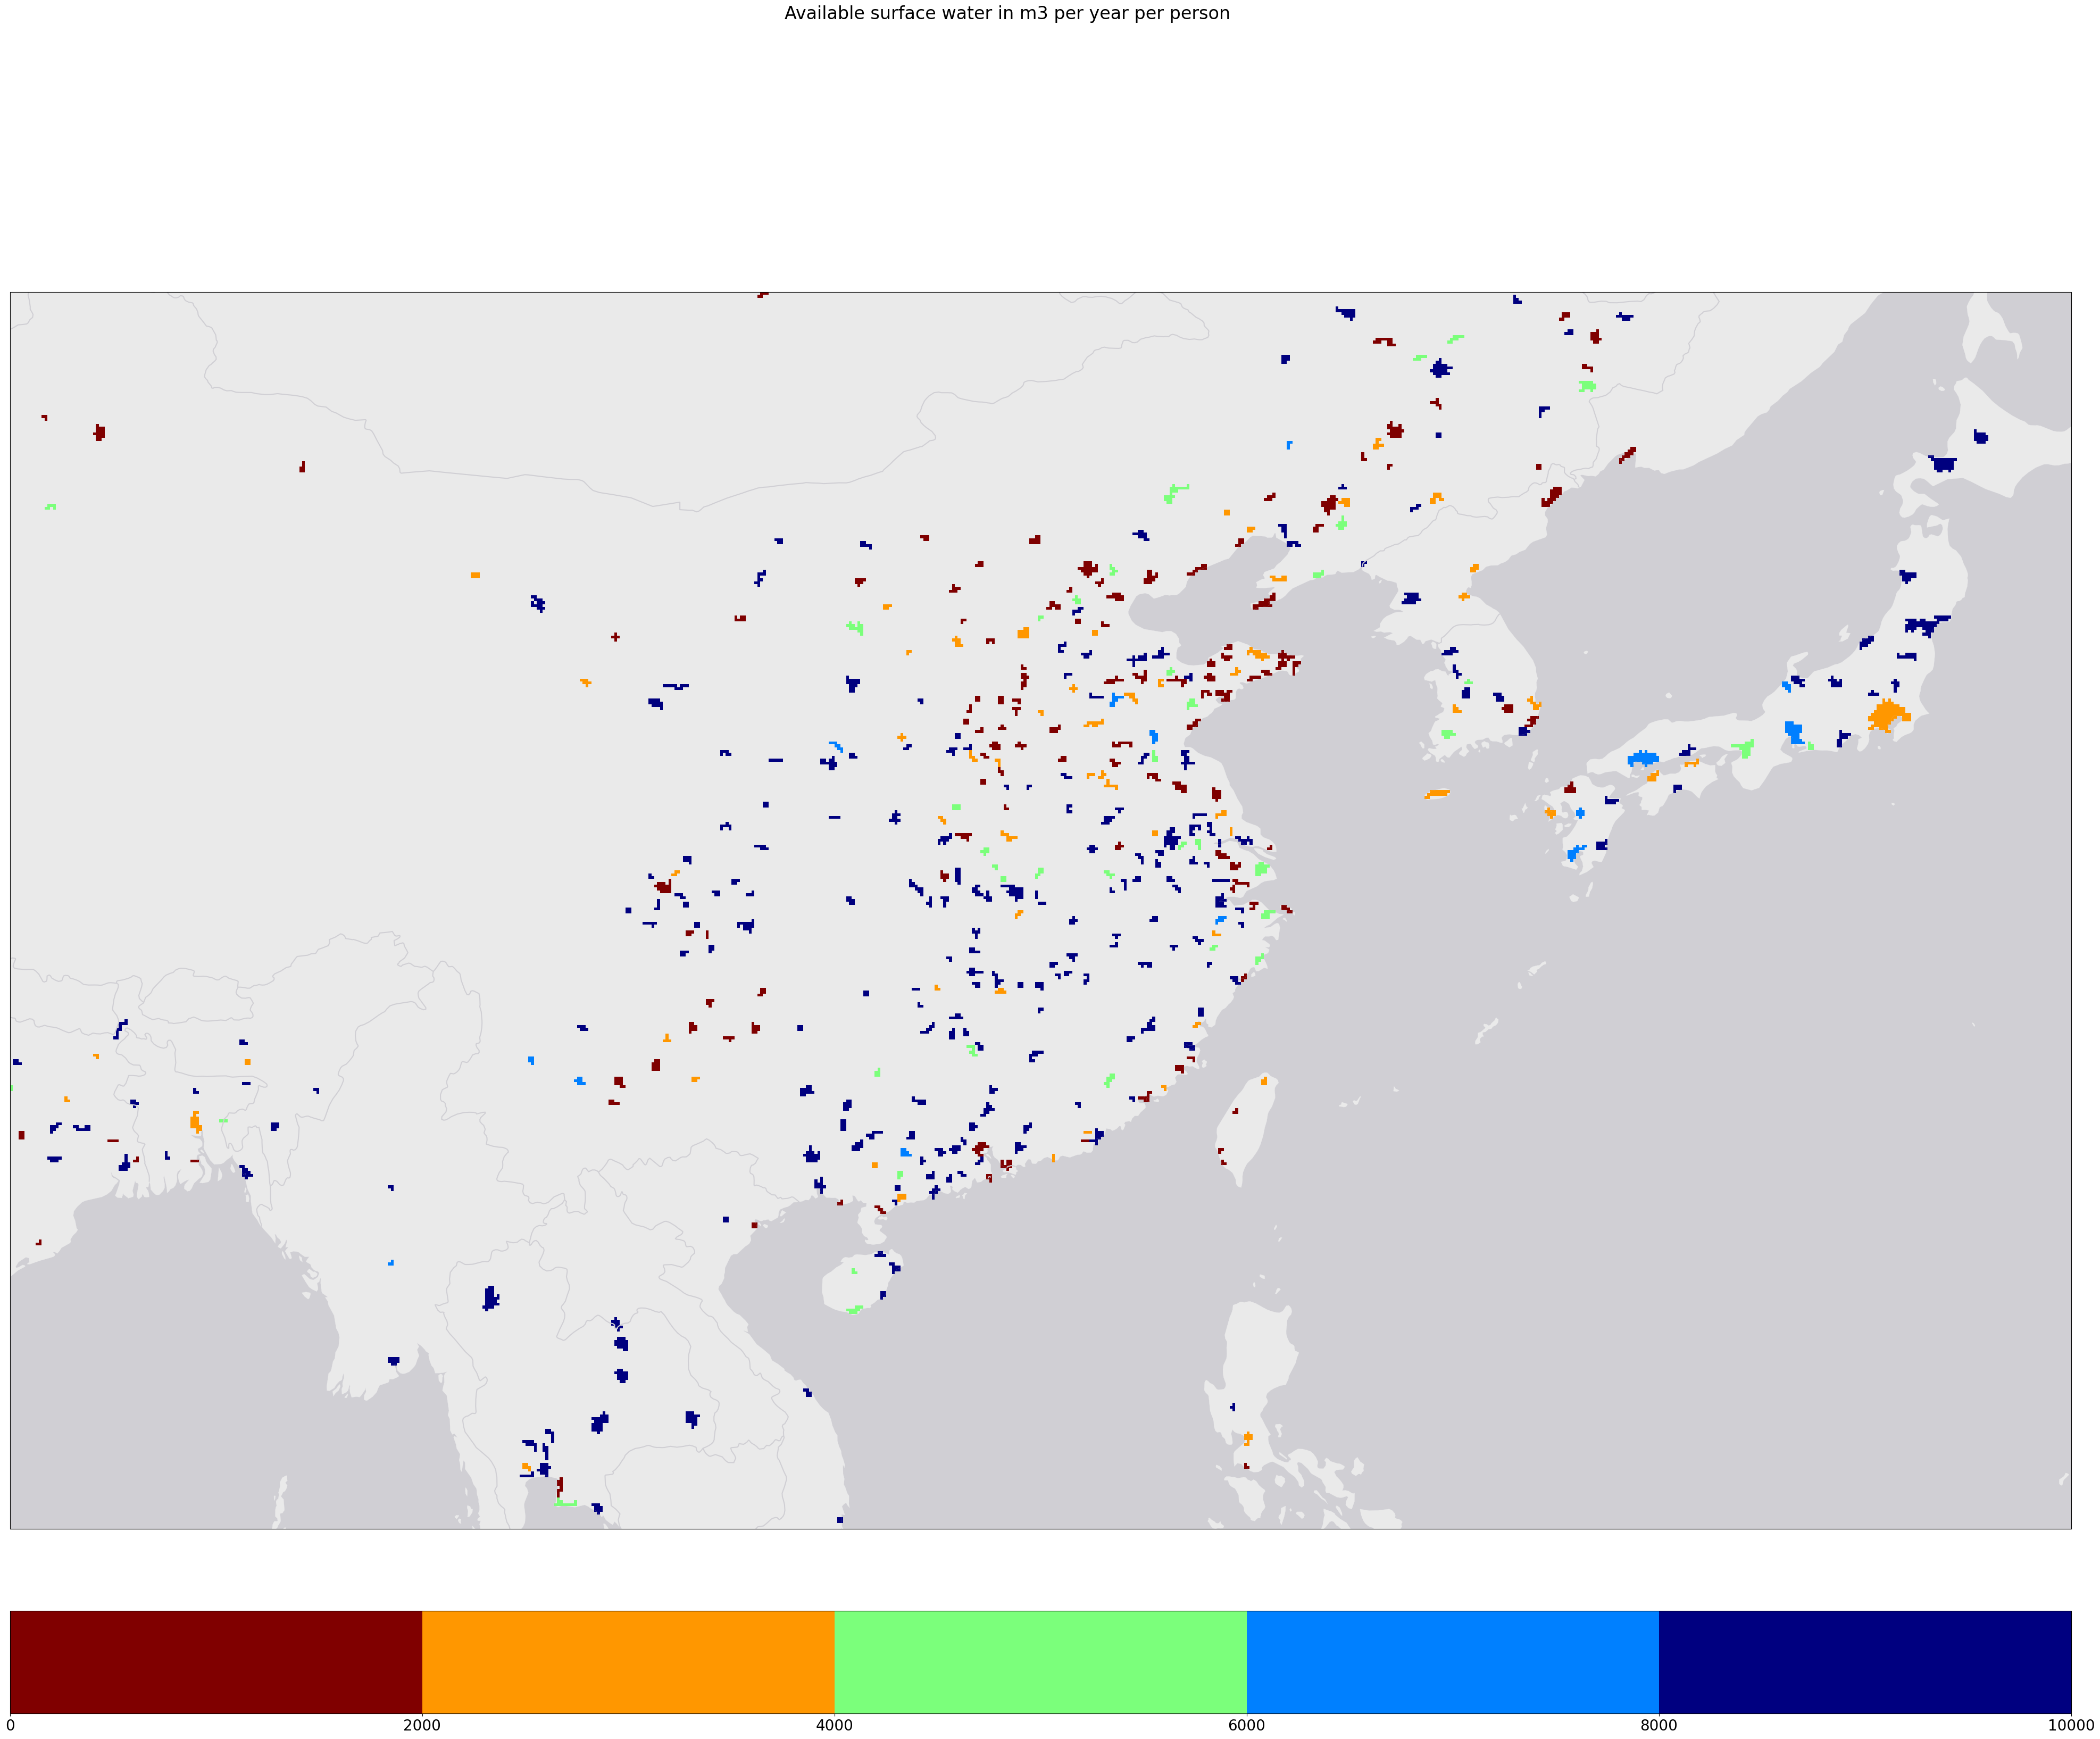

In [51]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(85, 145, 12, 48)
region = world_tmp[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)

color_num = 5
bnd_max = 1e4
cmap = plt.get_cmap('jet_r', color_num)  # 10個の離散値
bounds = np.linspace(0, bnd_max, color_num+1)  # 範囲を10分割
norm = mcolors.BoundaryNorm(bounds, cmap.N)

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
img = ax.imshow(region_masked, 
              cmap= cmap,
              norm = norm,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()